In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
from model_trainer import LabelTransferTrainer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras

In [2]:
datasets = pd.read_csv('datasets.csv')
datasets = datasets[~datasets['study_id'].isin(['Ho2020M', 'Ho2020F'])]

trainer = LabelTransferTrainer(hyperparams_file='hyperparams.csv',
                               data_dir='exported_matrices',
                               output_dir='label_transfer_model_output',
                               verbose=False,
                               random_seed=12345)

trainer.save_models_plots()

# Hyperparameter tuning

In [3]:
print(datasets['study_id'].unique())

['Ruf_Zamojski2021F' 'Ruf_Zamojski2021M' 'Lopez2021M' 'Allensworth2021F'
 'Vennekens2021M' 'Mayran2019M' 'Cheung2018M' 'Kucka2021F' 'Fletcher2019F'
 'Fletcher2019M']


In [4]:
study_id = 'Lopez2021M'
do_hyperparam_search = True
single_param_search = False

Sweep through the hyperparameters of the model to find the best combination of hyperparameters.

In [5]:
# valid_hyperparameters = ['learning_rate', 'num_layers', 'num_nodes', 'reg_factor', 
#                             'reg_type', 'dropout_rate', 'bn_momentum', 'batch_size']

if do_hyperparam_search:
    # We recreate the trainer object here in case we changed the hyperparams
    trainer = LabelTransferTrainer(hyperparams_file='hyperparams.csv',
                                      data_dir='exported_matrices',
                                      output_dir='label_transfer_model_output',
                                      verbose=False,
                                      random_seed=12345)

    if single_param_search:
        # Single hyperparameter
        param = "reg_type"
        values = ['l1', 'l2', 'l1_l2']
        
        res = trainer.tune_hyperparam(study_id, param, values, n_folds=5)
    else:        
        # Two hyperparameters
        param1 = "dropout_rate"
        param2 = "reg_factor"
        values1 = [0.1, 0.2, 0.3, 0.4, 0.5]
        values2 = [0.01, 0.05, 0.1, 0.5]
        
        res = trainer.tune_two_hyperparameters(study_id, param1, param2, values1, values2, n_folds=5)    


Training model Lopez2021M for 300 epochs, with reg_type = l1 and reg_factor = 0.01
Fold 1...

I0000 00:00:1716199126.769578 1891357 service.cc:145] XLA service 0x7f65a000c1c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1716199126.769596 1891357 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 3070, Compute Capability 8.6
I0000 00:00:1716199129.200353 1891357 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


max macro F1 score: 0.6309523582458496
Fold 2...max macro F1 score: 0.5666666030883789
Fold 3...max macro F1 score: 0.625
Fold 4...max macro F1 score: 0.7499999403953552
Fold 5...max macro F1 score: 0.8999998569488525
Training model Lopez2021M for 300 epochs, with reg_type = l1 and reg_factor = 0.05
Fold 1...max macro F1 score: 0.6309523582458496
Fold 2...max macro F1 score: 0.7499999403953552
Fold 3...max macro F1 score: 0.6999999284744263
Fold 4...max macro F1 score: 0.7499999403953552
Fold 5...max macro F1 score: 0.8666665554046631
Training model Lopez2021M for 300 epochs, with reg_type = l1 and reg_factor = 0.1
Fold 1...max macro F1 score: 0.6666666269302368
Fold 2...max macro F1 score: 0.7499999403953552
Fold 3...max macro F1 score: 0.8333332538604736
Fold 4...max macro F1 score: 0.64166659116745
Fold 5...max macro F1 score: 0.8999998569488525
Training model Lopez2021M for 300 epochs, with reg_type = l1 and reg_factor = 0.5
Fold 1...max macro F1 score: 0.6666666269302368
Fold 2...

In [7]:
res

,reg_type,reg_factor,Fold,Epoch,Loss,Macro F1 score,Micro F1 score,ROCAUC,Val loss,Val Macro F1 score,Val Micro F1 score,Val ROCAUC
0,l1,0.01,1,1,257.285553,0.312611,0.321429,0.562713,969.342834,0.333333,0.571429,0.714286
1,l1,0.01,1,2,933.569885,0.882865,0.892857,0.951105,996.465332,0.283333,0.428571,0.619048
2,l1,0.01,1,3,935.661133,0.922619,0.928571,0.952381,715.030640,0.380952,0.571429,0.693878
3,l1,0.01,1,4,691.677551,1.000000,1.000000,1.000000,666.002258,0.214286,0.428571,0.619048
4,l1,0.01,1,5,608.201538,0.933036,0.928571,0.952381,673.983521,0.414286,0.714286,0.809524
...,...,...,...,...,...,...,...,...,...,...,...,...
295,l1_l2,0.50,5,296,5969.749023,0.939834,0.928571,0.998087,6132.939941,0.166667,0.285714,0.564626
296,l1_l2,0.50,5,297,6130.818848,0.817199,0.821429,0.945791,6146.096191,0.071429,0.142857,0.469388
297,l1_l2,0.50,5,298,6141.973145,0.936842,0.964286,0.995111,6219.395996,0.071429,0.142857,0.510204
298,l1_l2,0.50,5,299,6215.877441,0.711842,0.892857,0.961309,5976.008301,0.171429,0.285714,0.612245


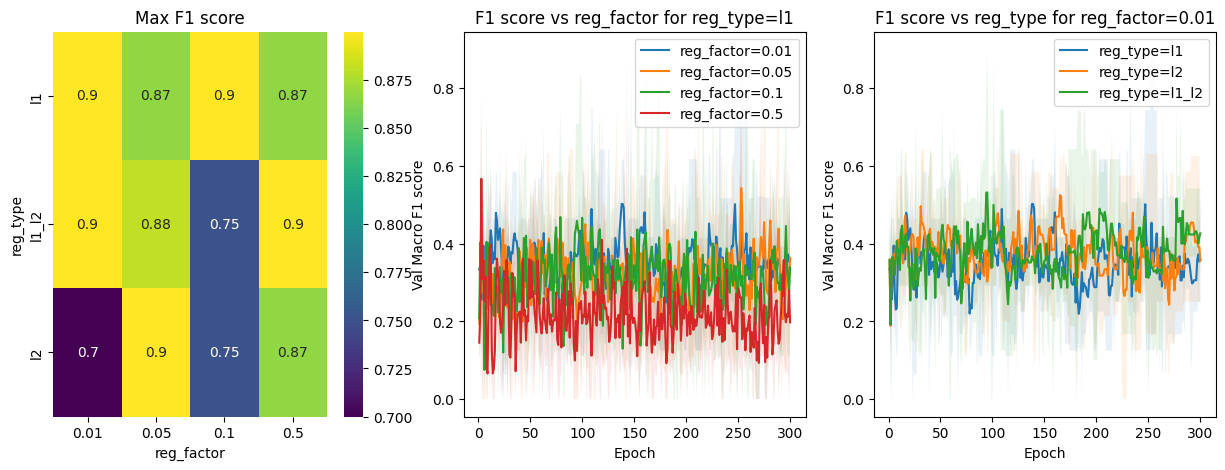

In [10]:
# Plot the results
# The results are saved in a pd dataframe with the following columns:
#   - <hyperparam>: the value of hyperparameter that was tuned
#   - Fold: the fold number
#   - Epoch: the epoch number
#   - Loss, Val loss: the training and validation loss
#   - F1 score, Val F1 score: the training and validation F1 score

if do_hyperparam_search:
    if single_param_search:
        # Single hyperparameter
        res_grouped = res.groupby(param)
        fig, ax = plt.subplots(1, 2, figsize=(10, 5))

        for param_value, group in res_grouped:
            mean_group = group.groupby("Epoch").mean(numeric_only=True)
            min_group = group.groupby("Epoch").min()
            max_group = group.groupby("Epoch").max()
            
            sns.lineplot(data=mean_group, x="Epoch", y="Macro F1 score",
                         ax=ax[0], label=f"{param}={param_value}")
            sns.lineplot(data=mean_group, x="Epoch", y="Val Macro F1 score",
                         ax=ax[1], label=f"{param}={param_value}")

            ax[0].fill_between(
                mean_group.index, min_group["Macro F1 score"], max_group["Macro F1 score"], alpha=0.1)
            ax[1].fill_between(
                mean_group.index, min_group["Val Macro F1 score"], max_group["Val Macro F1 score"], alpha=0.1)
            plt.ylim(0, 1)

        # Plot average F1 score
        ax[0].plot(res_grouped.mean()["Epoch"], res_grouped.mean()[
                   "Macro F1 score"], label="Average - train", color='C1')
        ax[1].plot(res_grouped.mean()["Epoch"], res_grouped.mean()[
                   "Val Macro F1 score"], label="Average - validation", color='C1')

        ax[0].set_title(f"F1 score vs {param}")
        ax[1].set_title(f"Validation F1 score vs {param}")
    else:
        # Two hyperparameters
        res_grouped = res.groupby([param1, param2])
        fig, ax = plt.subplots(1, 3, figsize=(15, 5))
        # Heatmap of max F1 for each pair of parameters
        max_f1 = res_grouped["Val Macro F1 score"].max().unstack()
        sns.heatmap(max_f1, annot=True, ax=ax[0], cmap='viridis')
        ax[0].set_title("Max F1 score")
        ax[0].set_xlabel(param2)
        ax[0].set_ylabel(param1)

        # Plot of F1 over epochs for max of param 1
        # Get the values of param1 and param2 that give max F1
        max_p1 = max_f1.idxmax(axis=0)[values2[0]]

        for param2_value in values2:
            group = res_grouped.get_group((max_p1, param2_value))
            mean_group = group.groupby("Epoch").mean(numeric_only=True)
            min_group = group.groupby("Epoch").min(numeric_only=True)
            max_group = group.groupby("Epoch").max(numeric_only=True)
            sns.lineplot(data=mean_group, x="Epoch", y="Val Macro F1 score",
                         ax=ax[1], label=f"{param2}={param2_value}")
            ax[1].fill_between(
                mean_group.index, min_group["Val Macro F1 score"], max_group["Val Macro F1 score"], alpha=0.1)
        ax[1].set_title(f"F1 score vs {param2} for {param1}={max_p1}")

        # Plot of F1 over epochs for max of param 2
        max_p2 = max_f1.idxmax(axis=1)[values1[0]]

        for param1_value in values1:
            group = res_grouped.get_group((param1_value, max_p2))
            mean_group = group.groupby("Epoch").mean(numeric_only=True)
            min_group = group.groupby("Epoch").min(numeric_only=True)
            max_group = group.groupby("Epoch").max(numeric_only=True)
            sns.lineplot(data=mean_group, x="Epoch", y="Val Macro F1 score",
                         ax=ax[2], label=f"{param1}={param1_value}")
            ax[2].fill_between(
                mean_group.index, min_group["Val Macro F1 score"], max_group["Val Macro F1 score"], alpha=0.1)
        ax[2].set_title(f"F1 score vs {param1} for {param2}={max_p2}")

    plt.show()

/home/nico/Storage/single_cell_env/lib/python3.10/site-packages/keras/src/layers/core/input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model Cheung2018M for 500 epochs...
Epoch 1/500


I0000 00:00:1715958578.555077  550732 service.cc:145] XLA service 0x7f56c800c250 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1715958578.555097  550732 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 3070, Compute Capability 8.6
2024-05-17 16:09:38.575584: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-05-17 16:09:39.507595: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8901


1/6 ━━━━━━━━━━━━━━━━━━━━ 16s 3s/step - ROCAUC: 0.5045 - accuracy: 0.2266 - loss: 10.2961 - macro_f1_score: 0.1810 - micro_f1_score: 0.2266

I0000 00:00:1715958581.063919  550732 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 760ms/step - ROCAUC: 0.7144 - accuracy: 0.4312 - loss: 9.4793 - macro_f1_score: 0.4026 - micro_f1_score: 0.4312 - val_ROCAUC: 0.8507 - val_accuracy: 0.5886 - val_loss: 8.6305 - val_macro_f1_score: 0.5767 - val_micro_f1_score: 0.5886
Epoch 2/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - ROCAUC: 0.9972 - accuracy: 0.9666 - loss: 7.1741 - macro_f1_score: 0.9674 - micro_f1_score: 0.9666 - val_ROCAUC: 0.8477 - val_accuracy: 0.6171 - val_loss: 8.4500 - val_macro_f1_score: 0.5937 - val_micro_f1_score: 0.6171
Epoch 3/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - ROCAUC: 0.9999 - accuracy: 0.9889 - loss: 6.6341 - macro_f1_score: 0.9892 - micro_f1_score: 0.9889 - val_ROCAUC: 0.8510 - val_accuracy: 0.6286 - val_loss: 7.9260 - val_macro_f1_score: 0.6087 - val_micro_f1_score: 0.6286
Epoch 4/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - ROCAUC: 1.0000 - accuracy: 0.9991 - loss: 6.0126 - macro_f1_score: 0.9992 - micro_f1_score: 0.9991 - val_ROCAUC: 0.8560 - val_accuracy: 0.6400 

I0000 00:00:1715958614.542993  571209 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_87', 100 bytes spill stores, 100 bytes spill loads



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.7010 - f1_score: 0.7010 - loss: 0.8969


[0.8968580365180969, 0.7010309100151062, 0.7010308504104614]

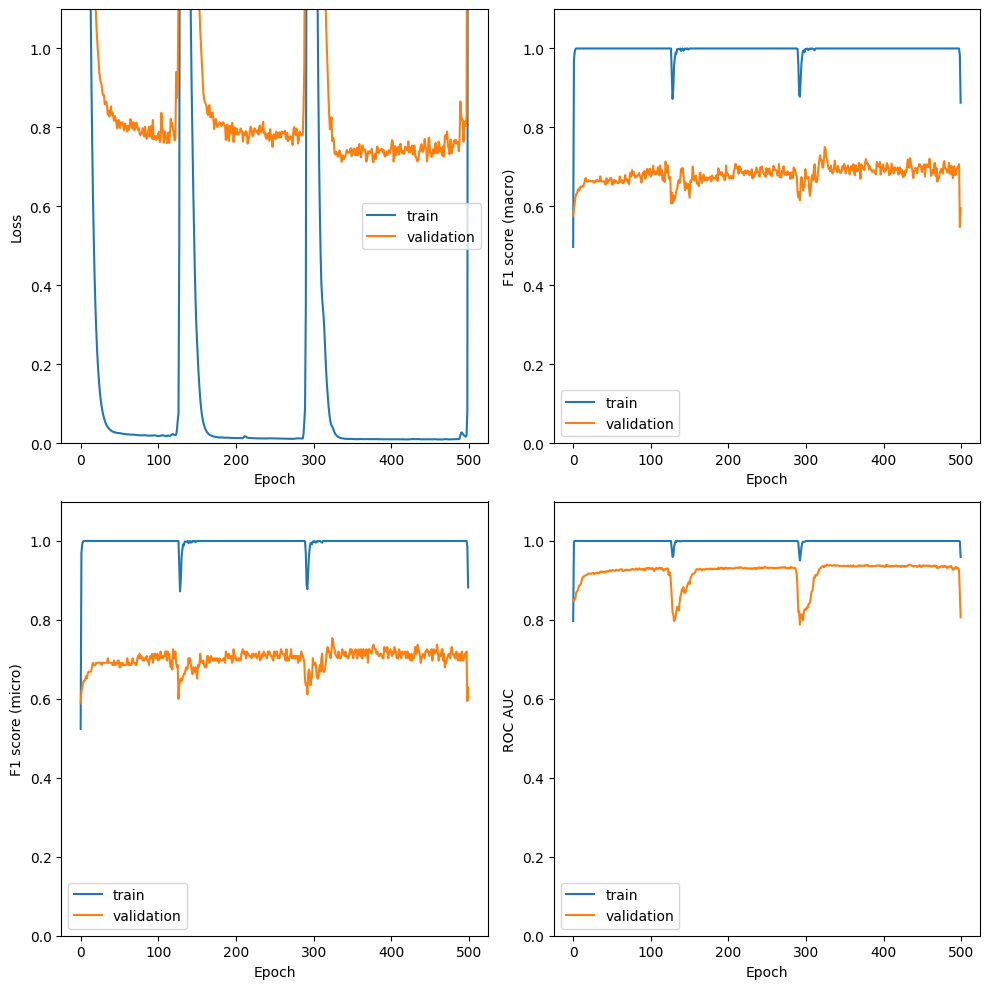

In [7]:
keras.backend.clear_session()
# We recreate the trainer object here in case we changed the hyperparams
trainer = LabelTransferTrainer(hyperparams_file='hyperparams.csv',
                            data_dir='exported_matrices',
                            output_dir='label_transfer_model_output',
                            verbose=False,
                            random_seed=12345) 
    
trainer.models[study_id], history = trainer.train_single_model(study_id)

fig, ax = plt.subplots(2, 2, figsize=(10, 10))

ax.flat[0].plot(history['loss'], label='train')
ax.flat[0].plot(history['val_loss'], label='validation')
ax.flat[0].set_xlabel('Epoch')
ax.flat[0].set_ylabel('Loss')

ax.flat[1].plot(history['macro_f1_score'], label='train')
ax.flat[1].plot(history['val_macro_f1_score'], label='validation')
ax.flat[1].set_xlabel('Epoch')
ax.flat[1].set_ylabel('F1 score (macro)')

ax.flat[2].plot(history['micro_f1_score'], label='train')
ax.flat[2].plot(history['val_micro_f1_score'], label='validation')
ax.flat[2].set_xlabel('Epoch')
ax.flat[2].set_ylabel('F1 score (micro)')

ax.flat[3].plot(history['ROCAUC'], label='train')
ax.flat[3].plot(history['val_ROCAUC'], label='validation')
ax.flat[3].set_xlabel('Epoch')
ax.flat[3].set_ylabel('ROC AUC')

for a in ax.flat:
    a.set_ylim(0, 1.1)
    a.legend()

plt.tight_layout()

trainer.evaluate_single_model(study_id)

# Training

In [16]:
keras.backend.clear_session()
# We recreate the trainer object here in case we changed the hyperparams
trainer = LabelTransferTrainer(hyperparams_file='hyperparams.csv',
                            data_dir='exported_matrices',
                            output_dir='label_transfer_model_output',
                            verbose=False,
                            random_seed=12345) 

# Uncomment to delete all saved model files
#trainer.clear_saved_models()
trainer.train_all_models(reset_models=True)

/home/nico/Storage/single_cell_env/lib/python3.10/site-packages/keras/src/layers/core/input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training model Allensworth2021F for 300 epochs...
Epoch 1/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 162ms/step - ROCAUC: 0.6809 - accuracy: 0.2605 - loss: 227.0182 - macro_f1_score: 0.2323 - micro_f1_score: 0.2605 - val_ROCAUC: 0.7563 - val_accuracy: 0.3506 - val_loss: 114.1867 - val_macro_f1_score: 0.2577 - val_micro_f1_score: 0.3506
Epoch 2/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - ROCAUC: 0.4980 - accuracy: 0.1940 - loss: 102.8641 - macro_f1_score: 0.1402 - micro_f1_score: 0.1940 - val_ROCAUC: 0.7007 - val_accuracy: 0.3030 - val_loss: 59.5400 - val_macro_f1_score: 0.1743 - val_micro_f1_score: 0.3030
Epoch 3/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - ROCAUC: 0.5243 - accuracy: 0.1739 - loss: 61.3048 - macro_f1_score: 0.1319 - micro_f1_score: 0.1739 - val_ROCAUC: 0.6912 - val_accuracy: 0.2684 - val_loss: 41.4744 - val_macro_f1_score: 0.1844 - val_micro_f1_score: 0.2684
Epoch 4/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - ROCAUC: 0.4739 - accuracy: 0.1457 - loss: 50.6726 - macro_f1_score: 0.1366 

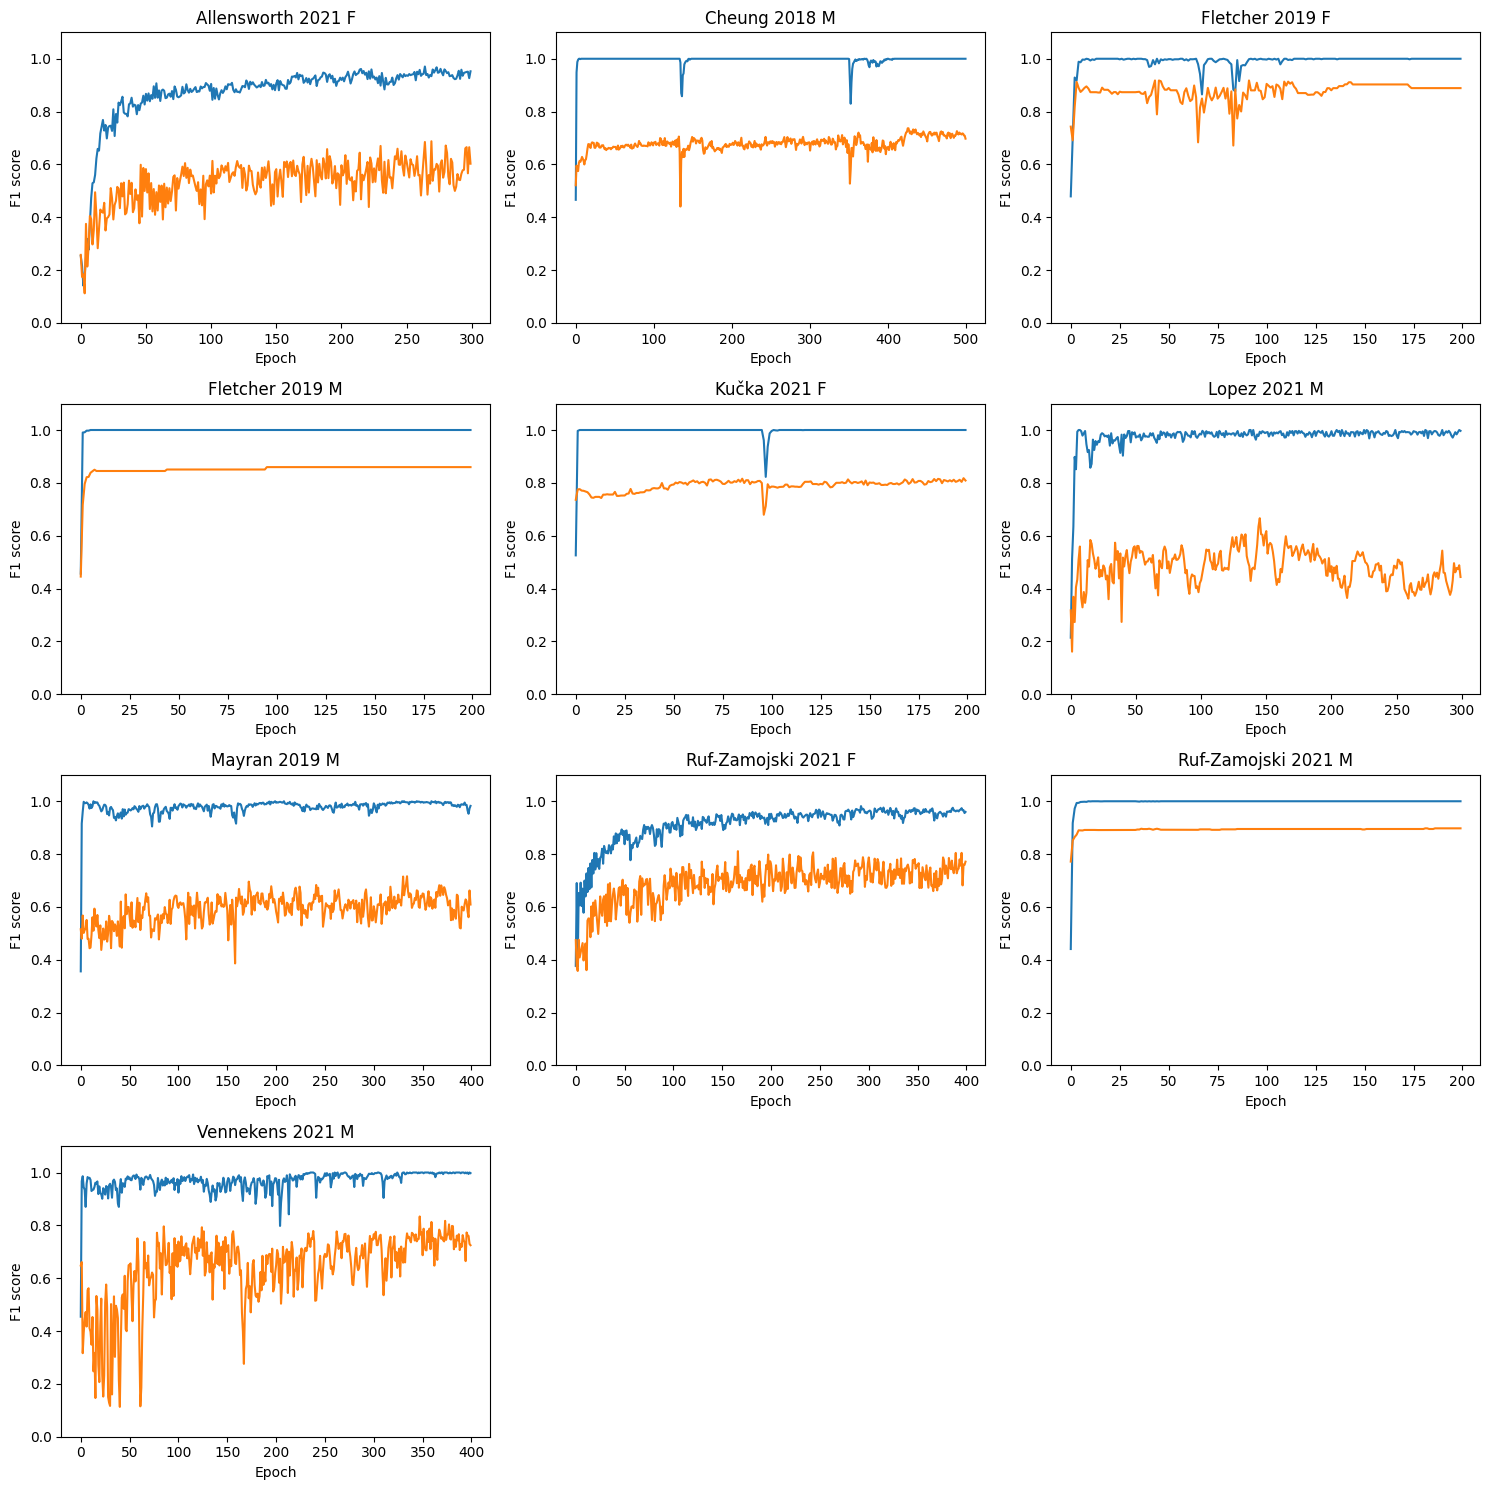

In [17]:
fig, ax = plt.subplots(4, 3, figsize=(15, 15))

dataset_names = [
    f"{d['author']} {d['year']} {d['sex']}" for _, d in datasets.iterrows()]
dataset_names = np.unique(dataset_names)
hist_keys = list(trainer.training_histories.keys())

for i, d in enumerate(dataset_names):
    a = ax.ravel()[i]
    a.plot(trainer.training_histories[hist_keys[i]]['macro_f1_score'])
    a.plot(trainer.training_histories[hist_keys[i]]['val_macro_f1_score'])
    a.set_title(d)
    a.set_ylim([0, 1.1])
    a.set_xlabel('Epoch')
    a.set_ylabel('F1 score')

ax.flat[-1].axis('off')
ax.flat[-2].axis('off')
plt.tight_layout()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - ROCAUC: 0.8894 - accuracy: 0.6917 - loss: 2.9045 - macro_f1_score: 0.6711 - micro_f1_score: 0.6917 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - ROCAUC: 0.9314 - accuracy: 0.7010 - loss: 0.7846 - macro_f1_score: 0.6818 - micro_f1_score: 0.7010
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - ROCAUC: 0.8659 - accuracy: 0.8101 - loss: 159.8009 - macro_f1_score: 0.8024 - micro_f1_score: 0.8101
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - ROCAUC: 0.9729 - accuracy: 0.8818 - loss: 0.4224 - macro_f1_score: 0.8769 - micro_f1_score: 0.8818
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - ROCAUC: 0.9778 - accuracy: 0.8267 - loss: 0.5376 - macro_f1_score: 0.7188 - micro_f1_score: 0.8267 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - ROCAUC: 0.7473 - accuracy: 0.5833 - loss: 34.8048 - macro_f1_score: 0.5244 - micro_f1_score: 0.5833
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - ROCAUC: 0.9028 - accuracy: 0.7083 - loss: 1.1919 - macro_f1_score: 0.7108 - micro_f1_score: 0.7083
1/1 ━━━━━━━━━━━━━━━━━━━━

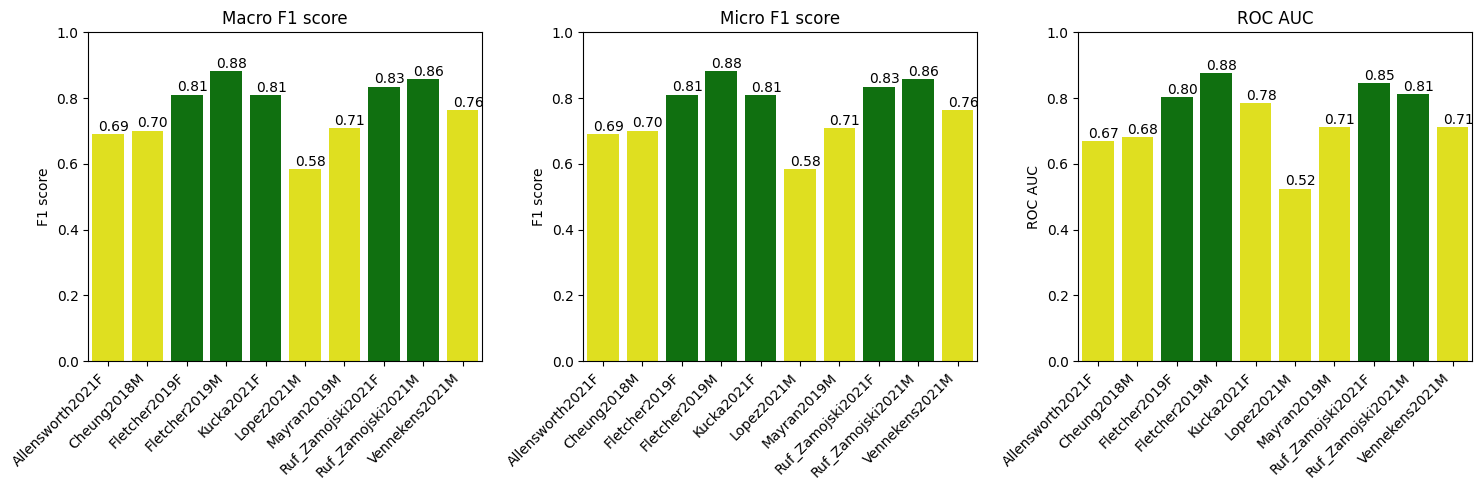

In [19]:
eval_res = trainer.evaluate_models()

macro_f1 = [r["macro_f1_score"] for r in eval_res.values()]
micro_f1 = [r["micro_f1_score"] for r in eval_res.values()]
rocauc = [r["ROCAUC"] for r in eval_res.values()]

# barplot of the F1 scores, colored in red if the F1 score is below 0.5, yellow if below 0.8,
# and green otherwise
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

sns.barplot(x=list(eval_res.keys()), y=macro_f1,
            palette=['red' if f < 0.5 else 'yellow' if f < 0.8 else 'green' for f in macro_f1],
            ax=ax[0])
ax[0].set_title('Macro F1 score')
ax[0].set_ylabel('F1 score')
for i, v in enumerate(macro_f1):
    ax[0].text(i - 0.25, v + 0.01, f"{v:.2f}")

sns.barplot(x=list(eval_res.keys()), y=micro_f1,
            palette=['red' if f < 0.5 else 'yellow' if f < 0.8 else 'green' for f in micro_f1],
            ax=ax[1])
ax[1].set_title('Micro F1 score')
ax[1].set_ylabel('F1 score')
for i, v in enumerate(micro_f1):
    ax[1].text(i - 0.25, v + 0.01, f"{v:.2f}")

sns.barplot(x=list(eval_res.keys()), y=rocauc,
            palette=['red' if f < 0.5 else 'yellow' if f < 0.8 else 'green' for f in rocauc],
            ax=ax[2])
ax[2].set_title('ROC AUC')
ax[2].set_ylabel('ROC AUC')
for i, v in enumerate(rocauc):
    ax[2].text(i - 0.25, v + 0.01, f"{v:.2f}")

for a in ax:
    a.set_ylim([0, 1])
    a.set_xticklabels(a.get_xticklabels(), rotation=45, ha='right')
    
plt.tight_layout()

# for f in macro_f1:
#     print(f"{f:.2f},", end="")
    

In [ ]:
print("\nMean F1 score:", np.mean(f1))
print("Median F1 score:", np.median(f1))
print("Std F1 score:", np.std(f1))


Mean F1 score: 0.7673579216003418
Median F1 score: 0.7730229198932648
Std F1 score: 0.09405627395289635


In [ ]:
# get layer regularization type
print(trainer.models["Cheung2018M"].layers[1].get_config()['kernel_regularizer'])

{'class_name': 'L2', 'config': {'l2': 0.009999999776482582}}
